In [2]:
# import libraries
import altair as alt
import pandas as pd

# it just needs to be here so we can work with big files 
alt.data_transformers.enable('default', max_rows=None)
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [14]:
df = pd.read_csv('https://gist.githubusercontent.com/andriy-gazin/ba80540e622b6e01b098ec623af236b1/raw/93be913d9891ec8b71ddce15ae81fb7321a063b7/wbdata.csv')
geo_shapes = pd.read_json('https://cms.ucu.edu.ua/pluginfile.php/157194/mod_assign/introattachment/0/world.geojson?forcedownload=1')
df.head()

ValueError: Expected object or value

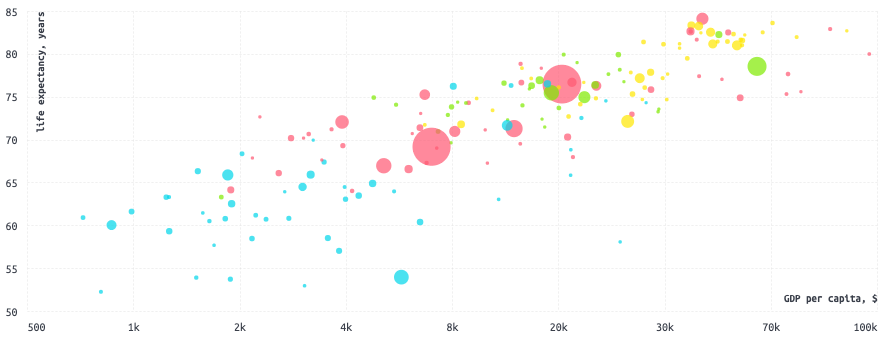

In [4]:
# configure axis and view

alt.Chart(df).mark_circle().encode(
    x = alt.X('gdpPerCap:Q', 
              title = 'GDP per capita, $',
              scale = alt.Scale(type = 'log', base = 2),
              axis = alt.Axis(format = '.1s')),
    y = alt.Y('lifeExp:Q', 
              title = 'life expectancy, years',
              scale = alt.Scale(zero = False)),
    color = alt.Color('continent:N', 
                      title = 'continent',
                      scale = alt.Scale(range = ["#00D5E9", "#7FEB00", "#FF5872", "#FFE700"]),
                      legend = None),
    size = alt.Size('pop:Q', 
                    title = 'population',
                    scale = alt.Scale(range = [10, 1500]),
                    legend = None)
).configure_axis( 
    domain = False, 
    ticks = False,
    labelPadding = 10,
    labelFont = 'Ubuntu Mono',
    labelFontSize = 12,
    labelColor = '#3A3F4A',
    titleFont = 'Ubuntu Mono',
    titleColor = '#3A3F4A',
    titleAnchor = "end",
    titlePadding = -40,
    gridWidth = 0.5,
    gridDash = [1, 0, 1]
).configure_view(
    strokeWidth = 0,
    width = 850
)

In [5]:
# Try plotting maps in 

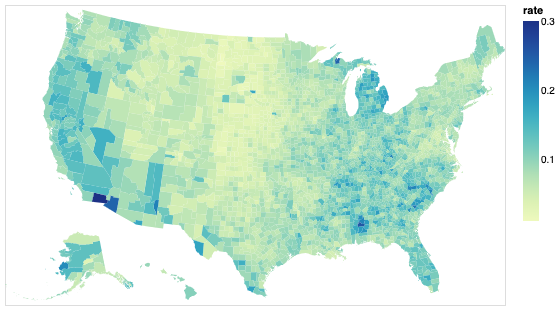

In [6]:
import altair as alt
from vega_datasets import data

counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

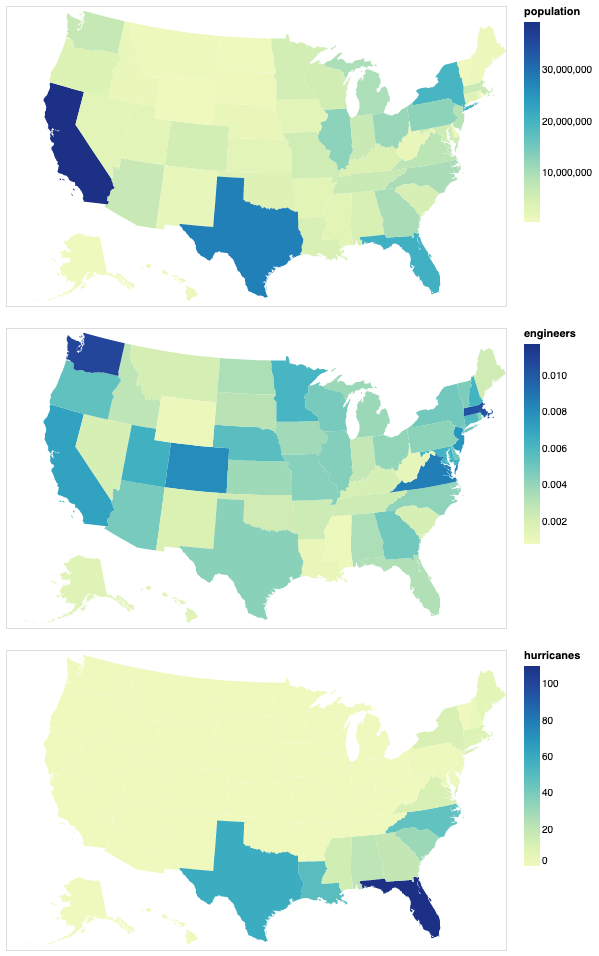

In [12]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
source = data.population_engineers_hurricanes.url
variable_list = ['population', 'engineers', 'hurricanes']

alt.Chart(states).mark_geoshape().encode(
    alt.Color(alt.repeat('row'), type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', variable_list)
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
).repeat(
    row=variable_list
).resolve_scale(
    color='independent'
)